# Damping control

Text(0, 0.5, 'Phase (degree)')

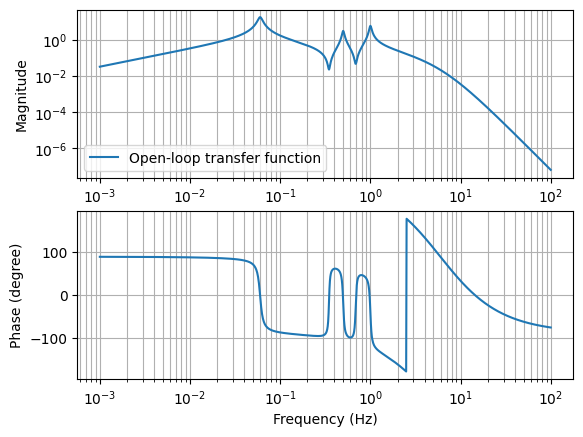

In [7]:
import control
import numpy as np
import matplotlib.pyplot as plt

import kontrol


# Load the transfer function
plant = kontrol.load_transfer_function("../system_modeling/transfer_function_x1_without_guess.pkl")

# Get a controller. regulator_type="D" for derivative control, which is a natural choice for damping.
# This function generates a critical damping controller.
controller = kontrol.regulator.oscillator.pid(plant, regulator_type="D")

# Get a low-pass filter.
# This lower the cut-off frequency of the low-pass filter until
# a specified phase margin is attained (defaults to 45 degrees.)
# Use the phase_margin option to override this.
low_pass = kontrol.regulator.post_filter.post_low_pass(plant, regulator=controller, order=4)

# Final filter.
controller *= low_pass

# Inspect the open-loop transfer function
oltf = controller*plant

f = np.logspace(-3, 2, 1024)

plt.subplot(211)
plt.loglog(f, abs((oltf)(1j*2*np.pi*f)), label="Open-loop transfer function")
plt.legend(loc=0)
plt.grid(which="both")
plt.ylabel("Magnitude")

plt.subplot(212)
plt.semilogx(f, 180/np.pi*np.angle(oltf(1j*2*np.pi*f)))
# plt.legend(loc=0)
plt.grid(which="both")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (degree)")

In [2]:
# ^This system has a UGF of around 1.2 Hz with a phase margin of about 45 degrees.
# Let's look at the open-loop and closed-loop performance against an impulse
t = np.linspace(0, 128, 1024)
_, y_open = control.impulse_response(plant, T=t)
_, y_close = control.impulse_response(plant/(1+oltf), T=t)

Text(0.5, 0, 'Time (s)')

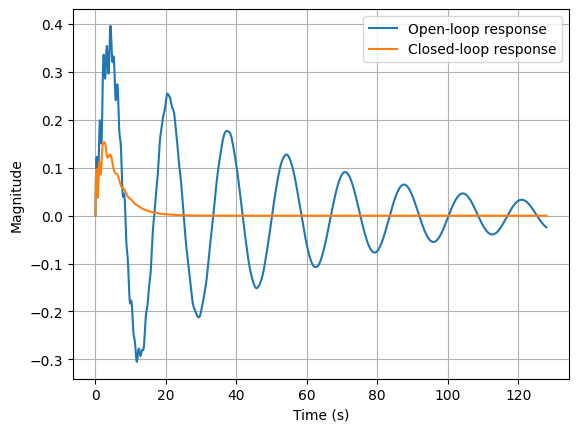

In [3]:
plt.plot(t, y_open, label="Open-loop response")
plt.plot(t, y_close, label="Closed-loop response")
plt.legend(loc=0)
plt.grid(which="both")
plt.ylabel("Magnitude")
plt.xlabel("Time (s)")
# ^Damped.

In [6]:
# Let's export the Foton string so we can install it into the digital system
controller = kontrol.TransferFunction(controller)
controller.foton(root_location="n")

'zpk([-0],[5.960099+i*0.001106;5.960099+i*-0.001106;5.962312+i*0.001107;5.962312+i*-0.001107],32.5136,"n")'